In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file = r'C:\Users\USER\Documents\MYSQL\clone\payment_gateway_forms.csv'

# Read file with open() using 'replace' for errors
with open(file, 'r', encoding='utf-8', errors='replace') as f:
    df = pd.read_csv(f)


In [3]:
# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


In [4]:
df.head()


,company_id,created_at,created_by,updated_at,compRegName,compRegNo,compTradingName,compEmail,compAddress1,compAddress2,...,status,phoneNumber,logo,notificationEmail,websiteLink,facebookLink,instagramLink,onlineStatus,is_fasspay_tnc,is_gkash_tnc
0,659,2020-12-23 11:47:34,592,2024-05-20 10:39:41,fgv,vvv,vvv,nuramira199605@gmail.com,1111d,2223e,...,NEW,011111t,NaN,sales@mesinkira.io,www.mesinkira. io,https://www.facebook.com/mesinkira.io/,https://www.instagram.com/mesinkira,APPROVED,1,1
1,764,2020-11-24 18:02:19,700,2023-05-24 11:36:50,Sentuhan Budi Trading,AS0231540T,Saadcapal,saadsaep06@gmail.com,NaN,NaN,...,PENDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,849,2021-04-09 13:00:44,895,2021-10-14 15:24:36,Fugeelah Creations Sdn Bhd,1360830-D,Fugeelah,admin@fugeelah.com,No 21,Jalan Setiabistari,...,APPROVED,0124414100,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,857,2021-01-20 13:41:12,793,2023-05-24 11:32:11,CT CAKE SHOP,001591599-D\n,kek kek ct,ctcakeshop.2021@gmail.com,KEDAI LOT 11,KG BUKIT GAJAH,...,PENDING,0199460459,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,867,2021-02-08 11:51:19,803,2021-03-23 17:01:57,ITCO NIAGA SDN BHD,1043173-K,ITCO NIAGA,itcoaqeela@gmail.com,suite 129 no.31-1,jalan pju 1/3G,...,APPROVED,0122896203,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [5]:
df.shape


(449, 65)

In [4]:
missing_values = df.isnull().sum()
total_values = len(df)
missing_percentage = (missing_values / total_values) * 100
print(missing_percentage)


company_id                0.000000
created_at                0.000000
created_by                0.000000
updated_at                0.000000
compRegName               0.668151
compRegNo                 0.668151
compTradingName           1.336303
compEmail                 0.668151
compAddress1              7.795100
compAddress2              8.240535
compAddress3              9.131403
compPostcode              7.795100
compCity                  7.795100
compState                 7.795100
compCountry               7.795100
compType                  9.354120
compTypeOthersDesc       94.209354
compNature                9.354120
compNatureOtherDesc      77.505568
compPriceRange           10.467706
compAverageSales         10.467706
politicInvolvement        0.000000
politicName1             98.440980
politicTitle1            98.440980
politicRelationship1     98.440980
politicType1             98.440980
politicName2             99.109131
politicTitle2            98.886414
politicRelationship2

Observations:
- Missing values for `ssm1`, `ssm2`, `ssm3` are **44.1.%**, **97.8%** and **98.9%** respectively.
- Missing values for `ic_1`, `ic_2`, `ic_3` are 46.1%, 97.1% and 99.8% respectively.


# Exploratory Data Analysis

In [5]:
# Application Status for Payment Gateway
df['status'].value_counts()


status
SUBMITTED    154
PROBLEM      103
NEW           84
APPROVED      70
PENDING       35
Name: count, dtype: int64

In [6]:
ssm_counts = df[['ssm_1', 'ssm_2', 'ssm_3']].count()
ssm_counts_df = ssm_counts.reset_index()
ssm_counts_df.columns = ['Column', 'Count']
ssm_counts_df


,Column,Count
0,ssm_1,251
1,ssm_2,10
2,ssm_3,5


C:\Users\USER\AppData\Local\Temp\ipykernel_3760\3947173551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['ssm_1_uploaded'] = cleaned_data['ssm_1'].notnull()


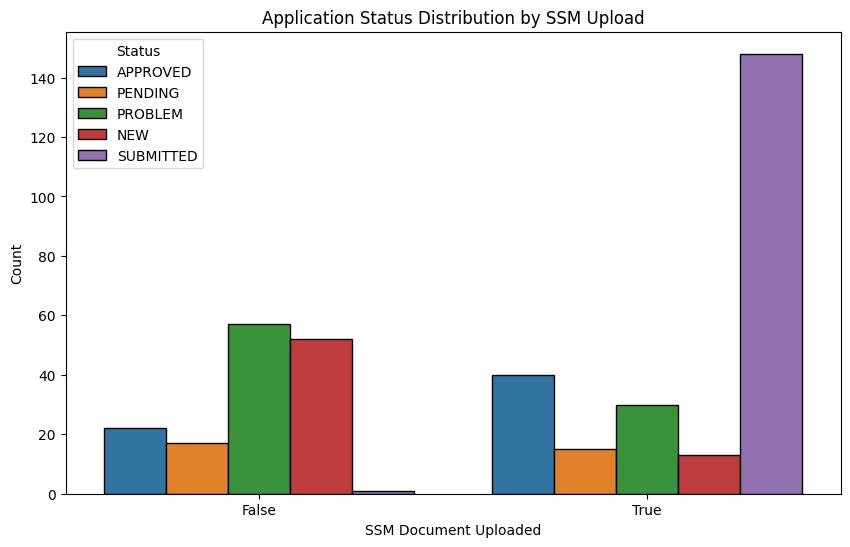

In [78]:
# Create a new column 'ssm_1_uploaded' indicating whether the 'ssm_1' document is uploaded
cleaned_data['ssm_1_uploaded'] = cleaned_data['ssm_1'].notnull()

# Plotting the distribution of application statuses based on 'ssm_1_uploaded'
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='ssm_1_uploaded', hue='status', edgecolor='black')
plt.title('Application Status Distribution by SSM Upload')
plt.xlabel('SSM Document Uploaded')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


In [ ]:
# Plotting the distribution of application statuses based on 'ssm_1_uploaded'
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='ssm_1_uploaded', hue='status', edgecolor='black')
plt.title('Application Status Distribution by SSM Upload')
plt.xlabel('SSM Document Uploaded')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


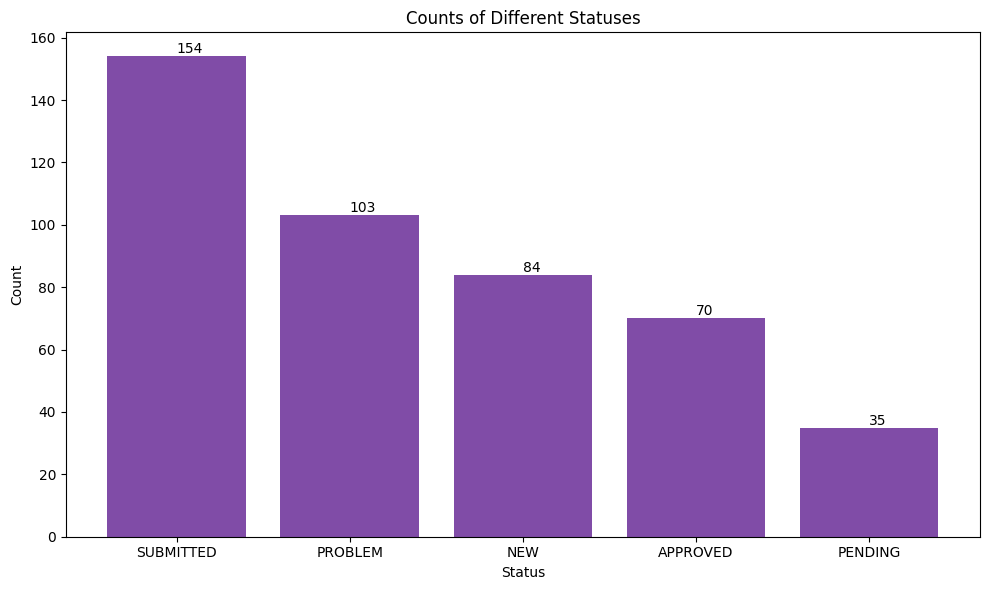

In [21]:
status_counts = df['status'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(status_counts.index, status_counts.values, color='indigo', alpha=0.7)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Counts of Different Statuses')
plt.xticks(rotation=0)
plt.grid(False) #axis='y', linestyle='--', alpha=0.7)

# Adding count values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va='bottom' to place text at the top of the bar

plt.tight_layout()
plt.show()


In [27]:
df['compType'].value_counts()


compType
Sole Proprietor               225
Pemilik Tunggal                48
Sendirian Berhad (Sdn.Bhd)     45
Partnership                    38
Others                         19
Non-Profit                      8
Petty Trader                    6
Berhad (Bhd.)                   3
Perkongsian                     3
gg                              2
Pedagang Kecil                  2
SERVICE                         1
dd                              1
a                               1
Bukan keuntungan                1
Lain Lain                       1
n                               1
BEVERANGE                       1
Sole Proprietork                1
Name: count, dtype: int64

In [26]:
# Bank Names for Payment Gateway Application
df['bankName'].value_counts()


bankName
Maybank         56
MAYBANK         52
maybank         25
CIMB            23
CIMB BANK       14
                ..
OCBC             1
na               1
Maybank Bhd      1
abc company      1
Cimb bank        1
Name: count, Length: 129, dtype: int64

Bank names are not standardized, requiring preprocessing.

In [32]:
df['bankName'].dtypes


dtype('O')

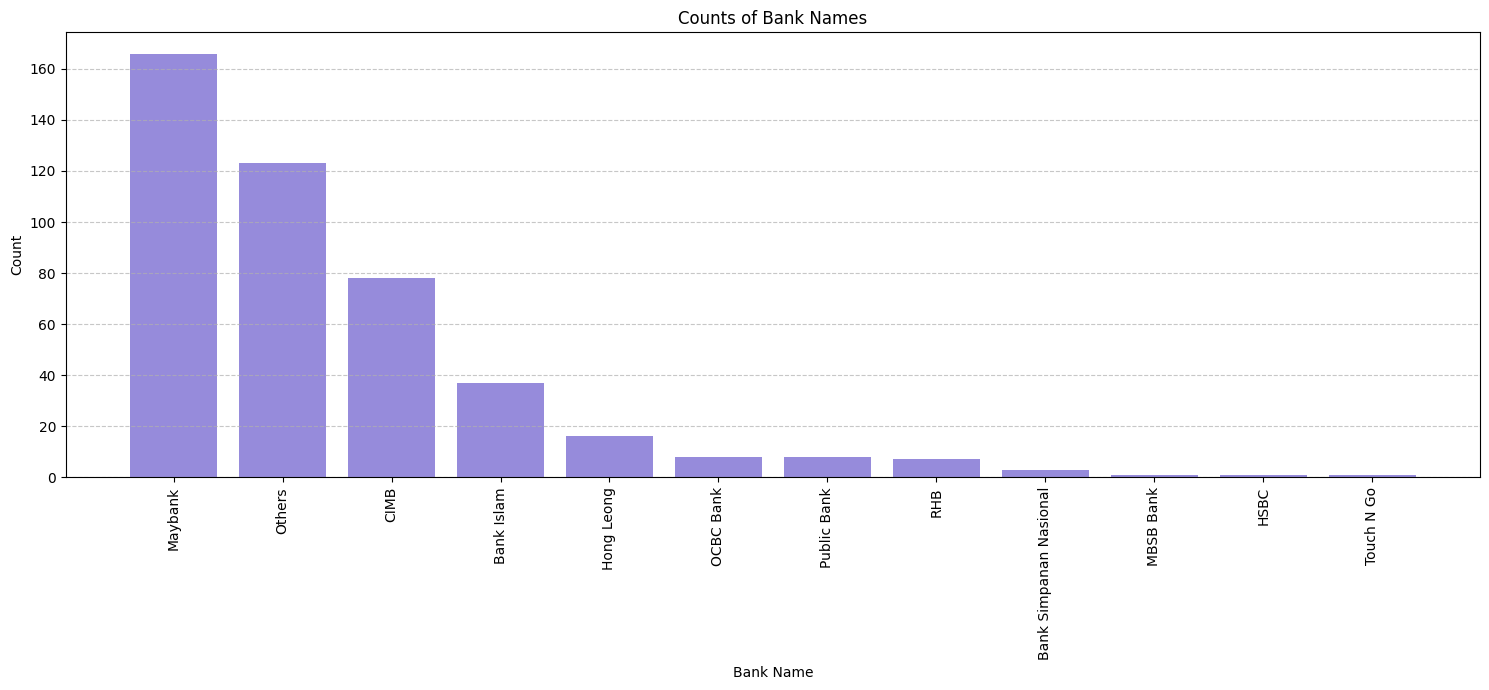

In [58]:
import re

# Function to standardize bank names
def standardize_bank_name(name):
    if pd.isnull(name) or not isinstance(name, str):
        return 'Unknown'
    name = name.strip().lower()
    # Remove common words
    name = re.sub(r'\b(group|berhad)\b', '', name)
    # Replace multiple spaces with a single space
    name = re.sub(r'\s+', ' ', name).strip()
    # Specific standardizations
    if 'maybank' in name:
        return 'Maybank'
    elif 'malayan' in name:
        return 'Maybank'
    elif 'mybank' in name:
        return 'Maybank'
    elif 'maybak' in name:
        return 'Maybank'
    elif 'cimb' in name:
        return 'CIMB'
    elif 'hong leong' in name:
        return 'Hong Leong'
    elif 'hongleong' in name:
        return 'Hong Leong'
    elif 'touch n go' in name:
        return 'Touch N Go'
    elif 'bank islam' in name:
        return 'Bank Islam'
    elif 'bank simpanan nasional' in name:
        return 'Bank Simpanan Nasional'
    elif 'public bank' in name:
        return 'Public Bank'
    elif 'ocbc' in name:
        return 'OCBC Bank'
    elif 'obcb' in name:
        return 'OCBC Bank'
    elif 'rhb' in name:
        return 'RHB'
    elif 'hsbc' in name: 
        return 'HSBC'
    elif 'mbsb' in name:
        return 'MBSB Bank'
    return name.title()

# Apply the function to the 'bankName' column
df['bankName'] = df['bankName'].apply(standardize_bank_name)

# Get the value counts for the 'bankName' column
bankname_counts = df['bankName'].value_counts()

# Plotting the value counts as a bar chart
plt.figure(figsize=(15, 7))
bars = plt.bar(bankname_counts.index, bankname_counts.values, color='slateblue', alpha=0.7)
plt.xlabel('Bank Name')
plt.ylabel('Count')
plt.title('Counts of Bank Names')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [55]:
# Price Range of Company Items 
df['compPriceRange'].value_counts()


compPriceRange
Below RM50          178
Above RM1,000        37
RM51 - RM100         36
Dibawah RM50         33
RM101 - RM500        33
RM101-RM500          29
RM51-RM100           24
RM501 - RM1,000      13
RM501-RM1,000         8
Melebihi RM1,000      4
kkk                   2
Below RM50o           1
h                     1
e                     1
na                    1
BELOW RM50            1
Name: count, dtype: int64

47

In [61]:
df['compAverageSales'].value_counts()


compAverageSales
5000               48
1000               44
2000               38
3000               34
10000              30
100                24
500                18
1500               16
20000              15
50                  9
30000               7
25000               6
4000                6
200                 5
12000               5
50000               5
6000                5
15000               5
2500                5
8000                4
150                 4
30                  4
500000              3
7000                3
5                   3
0.01                3
10                  3
ll                  2
300                 2
40000               2
1800                2
400                 2
100000              2
700                 2
15                  2
9000                2
1200                2
2                   2
f                   1
na                  1
5200                1
10,000              1
5800                1
6                   1
3500           

In [64]:
# Cleaning the 'compPriceRange' and 'compAverageSales' columns

# Standardize 'compPriceRange' values
df['compPriceRange'] = df['compPriceRange'].str.replace('Below RM50o', 'Below RM50')
df['compPriceRange'] = df['compPriceRange'].str.replace('Dibawah RM50', 'Below RM50')
df['compPriceRange'] = df['compPriceRange'].str.replace('Melebihi RM1,000', 'Above RM1,000')
df['compPriceRange'] = df['compPriceRange'].str.replace('kkk', 'Unknown')
df['compPriceRange'] = df['compPriceRange'].str.replace('h', 'Unknown')
df['compPriceRange'] = df['compPriceRange'].str.replace('e', 'Unknown')
df['compPriceRange'] = df['compPriceRange'].str.replace('na', 'Unknown')
df['compPriceRange'] = df['compPriceRange'].str.replace('BELOW RM50', 'Below RM50')

# Standardize 'compAverageSales' values
df['compAverageSales'] = df['compAverageSales'].replace(['100999p', 'll', 'i', 'na', 'f'], 'Unknown')

# Filtering out rows with 'Unknown' in 'compPriceRange' and 'compAverageSales'
cleaned_data = df[~df['compPriceRange'].isin(['Unknown', np.nan])]
cleaned_data = cleaned_data[~cleaned_data['compAverageSales'].isin(['Unknown', np.nan])]

# Displaying the cleaned unique values
cleaned_price_range_unique = cleaned_data['compPriceRange'].unique()
cleaned_average_sales_unique = cleaned_data['compAverageSales'].unique()

cleaned_price_range_unique, cleaned_average_sales_unique


(array(['RM51-RM100', 'RM101-RM500', 'BUnknownlow RM50',
        'AbovUnknown RM1,000', 'RM501 - RM1,000', 'RM501-RM1,000',
        'RM101 - RM500', 'RM51 - RM100'], dtype=object),
 array(['400', '7000', '10000', '1200', '9000', '30', '1100', '3000',
        '5000', '12000', '1000', '100', '550', '10', '50', '20000', '2000',
        '60', '500', '30000', '50000', '1500', '80000', '15', '4000', '90',
        '2200', '11', '25000', '150', '8000', '222', '700',
        '100000000000000', '200', '60000', '500000', '2500', '15000',
        '6000', '100000', '800', '1800', '70000', '600', '0.01', '1.8',
        '2', '6', '300', '250', '40000', '5200', '5', '10,000', '5800',
        '3500', '16000', '25', '333.34', '9.9'], dtype=object))

In [66]:
# Fixing the remaining issues in 'compPriceRange'
df['compPriceRange'] = df['compPriceRange'].str.replace('BUnknownlow RM50', 'Below RM50')
df['compPriceRange'] = df['compPriceRange'].str.replace('AbovUnknown RM1,000', 'Above RM1,000')

# Converting 'compAverageSales' to numeric, forcing errors to NaN and then dropping them
df['compAverageSales'] = pd.to_numeric(df['compAverageSales'], errors='coerce')

# Dropping rows with NaN values in 'compPriceRange' or 'compAverageSales'
cleaned_data = df.dropna(subset=['compPriceRange', 'compAverageSales'])

# Displaying the cleaned unique values
cleaned_price_range_unique = cleaned_data['compPriceRange'].unique()
cleaned_average_sales_unique = cleaned_data['compAverageSales'].unique()

cleaned_price_range_unique, cleaned_average_sales_unique


(array(['RM51-RM100', 'RM101-RM500', 'Below RM50', 'Above RM1,000',
        'RM501 - RM1,000', 'RM501-RM1,000', 'RM101 - RM500',
        'RM51 - RM100'], dtype=object),
 array([4.0000e+02, 7.0000e+03, 1.0000e+04, 1.2000e+03, 9.0000e+03,
        3.0000e+01, 1.1000e+03, 3.0000e+03, 5.0000e+03, 1.2000e+04,
        1.0000e+03, 1.0000e+02, 5.5000e+02, 1.0000e+01, 5.0000e+01,
        2.0000e+04, 2.0000e+03, 6.0000e+01, 5.0000e+02, 3.0000e+04,
        5.0000e+04, 1.5000e+03, 8.0000e+04, 1.5000e+01, 4.0000e+03,
        9.0000e+01, 2.2000e+03, 1.1000e+01, 2.5000e+04, 1.5000e+02,
        8.0000e+03, 2.2200e+02, 7.0000e+02, 1.0000e+14, 2.0000e+02,
        6.0000e+04, 5.0000e+05, 2.5000e+03, 1.5000e+04, 6.0000e+03,
        1.0000e+05, 8.0000e+02, 1.8000e+03, 7.0000e+04, 6.0000e+02,
        1.0000e-02, 1.8000e+00, 2.0000e+00, 6.0000e+00, 3.0000e+02,
        2.5000e+02, 4.0000e+04, 5.2000e+03, 5.0000e+00, 5.8000e+03,
        3.5000e+03, 1.6000e+04, 2.5000e+01, 3.3334e+02, 9.9000e+00]))

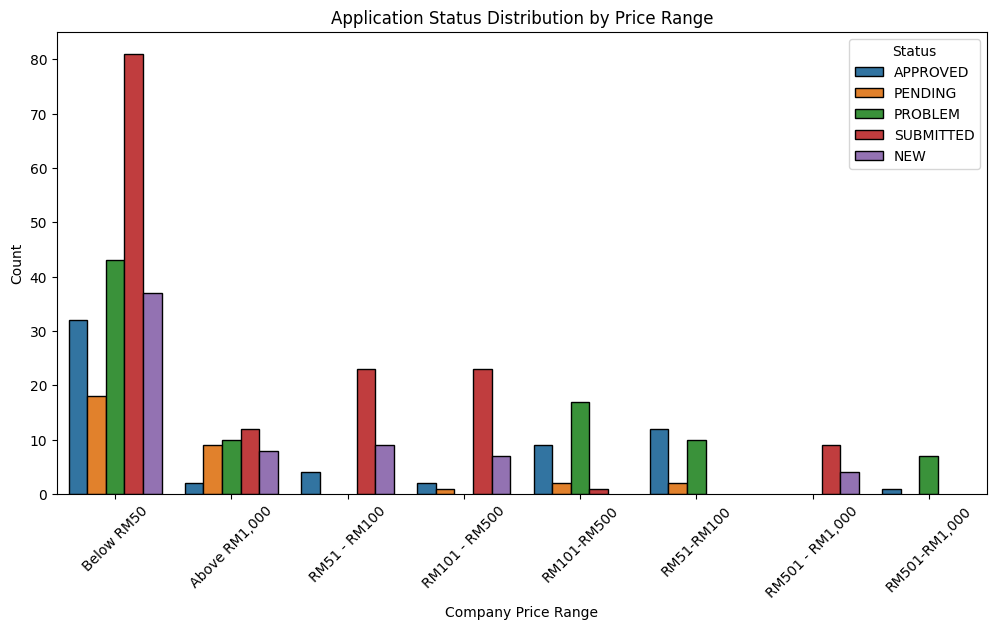

In [70]:
# Plotting the distribution of application statuses based on 'compPriceRange'
plt.figure(figsize=(12, 6))
bars = sns.countplot(
    data=cleaned_data, 
    x='compPriceRange', 
    hue='status', 
    order=cleaned_data['compPriceRange'].value_counts().index,
    edgecolor='black'
)
plt.title('Application Status Distribution by Price Range')
plt.xlabel('Company Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')

for bar in bars.patches:
    bar.set_edgecolor('black')

plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_3760\3758346027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_3760\3758346027.py:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(


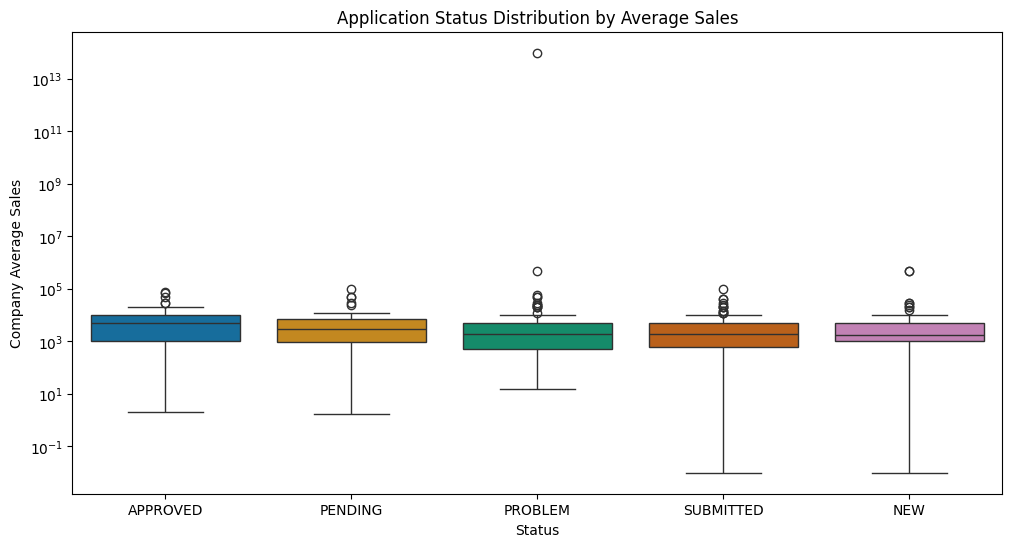

In [75]:
boxplot_palette = sns.color_palette("colorblind")

# Plotting the distribution of application statuses based on 'compAverageSales'
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=cleaned_data, 
    x='status', 
    y='compAverageSales', 
    palette=boxplot_palette
)
plt.title('Application Status Distribution by Average Sales')
plt.xlabel('Status')
plt.ylabel('Company Average Sales')
plt.yscale('log')
plt.show()


In [56]:
df['compNature'].value_counts()


compNature
Retail                                  89
Others                                  79
Food & Restaurant                       72
Food & restaurant                       57
Runcit                                  15
Lain Lain                               14
Makanan & Restoran                      11
Professional and commercial services     9
Professional & Commercial Services       9
Makanan dan Restoran                     6
Utilities                                5
Servis Profesional & Komersial           5
Accommodation and hotel                  4
Transportation                           4
Government services                      3
Government Services                      2
ii                                       2
Financial Service                        2
Insurance                                2
Lain-lain                                2
Fuel/petrol                              2
Amusement and entertainment              2
Mail & Telephone Order                   1


In [4]:
df['compState'].value_counts()


compState
Selangor           106
Kuala Lumpur        65
Johor               51
Perak               33
Sabah               29
Kedah               27
Negeri Sembilan     17
Terengganu          15
Kelantan            12
Pahang              11
Melaka               9
Sarawak              9
Pulau Pinang         9
Perlis               8
Putrajaya            5
selangor             2
j                    1
kuala lumpur         1
Kuala Lumpuri        1
sel                  1
SABAH                1
SELANGOR             1
Name: count, dtype: int64

In [60]:
df['politicInvolvement'].value_counts()


politicInvolvement
0    436
1     13
Name: count, dtype: int64